In [8]:
import pandas as pd
import json
import numpy as np
import os
import requests
import csv
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

csv_data = os.path.join(".","Border_Crossing_Entry_Data.csv")

In [9]:
border_df = pd.read_csv(csv_data)

border_df.dtypes

Port Name     object
State         object
Port Code      int64
Border        object
Date          object
Measure       object
Value          int64
Latitude     float64
Longitude    float64
Point         object
dtype: object

In [10]:
border_df['Date'] = pd.to_datetime(border_df['Date'].str.strip(), errors='coerce')

border_df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Latitude            float64
Longitude           float64
Point                object
dtype: object

In [11]:
border_df

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,2023-12-01,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,2023-12-01,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
3,Whitlash,Montana,3321,US-Canada Border,2024-01-01,Personal Vehicles,29,48.997,-111.258,POINT (-111.257916 48.99725)
4,Ysleta,Texas,2401,US-Mexico Border,2024-01-01,Personal Vehicle Passengers,521714,31.673,-106.335,POINT (-106.335449846028 31.6731261376859)
...,...,...,...,...,...,...,...,...,...,...
395633,Portland,Maine,101,US-Canada Border,1996-04-01,Rail Containers Loaded,0,43.659,-70.243,POINT (-70.243056 43.659444)
395634,Trout River,New York,715,US-Canada Border,1997-10-01,Rail Containers Loaded,0,44.992,-74.308,POINT (-74.308172 44.992058)
395635,Raymond,Montana,3301,US-Canada Border,1996-07-01,Trains,0,48.999,-104.574,POINT (-104.574333 48.999194)
395636,Westhope,North Dakota,3419,US-Canada Border,1996-03-01,Trains,0,49.000,-101.017,POINT (-101.017277 48.999611)


In [12]:
#group by state
grouped_df = border_df.groupby(['State'])['Value'].sum().reset_index() 

grouped_df['Value'] = grouped_df['Value'].apply(lambda x: '{:,.0f}'.format(x))

grouped_df

,State,Value
0,Alaska,"16,439,289"
1,Arizona,"1,051,153,667"
2,California,"3,017,628,464"
3,Idaho,"24,283,901"
4,Maine,"250,933,301"
5,Michigan,"841,662,282"
6,Minnesota,"108,065,425"
7,Montana,"62,095,686"
8,New Mexico,"84,664,403"
9,New York,"929,129,781"


In [13]:
# Group by year
border_df['Year'] = border_df['Date'].dt.year 

total_value_by_year = border_df.groupby('Year')['Value'].sum().reset_index()

total_value_by_year

,Year,Value
0,1996,429790351
1,1997,494174198
2,1998,508588404
3,1999,538456724
4,2000,540021542
5,2001,493083902
6,2002,475702818
7,2003,456392653
8,2004,458220298
9,2005,450234268


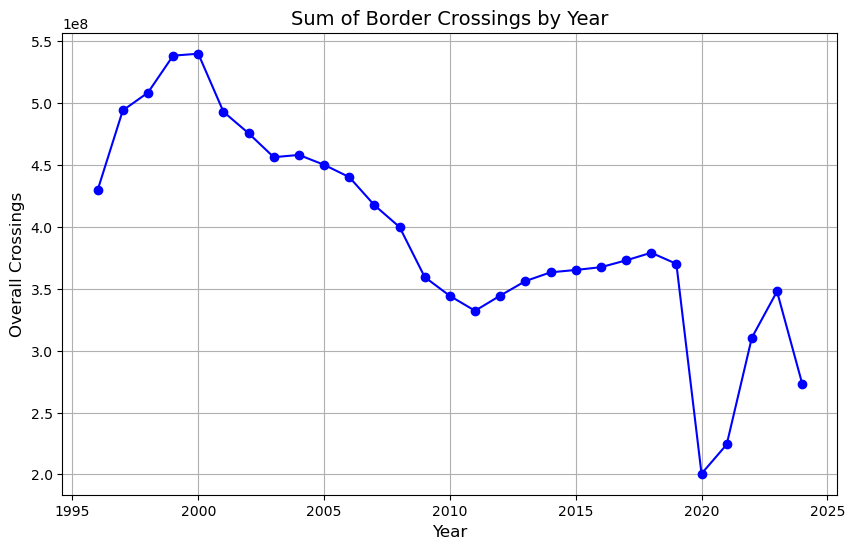

In [14]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(total_value_by_year['Year'], total_value_by_year['Value'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Sum of Border Crossings by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Overall Crossings', fontsize=12)

plt.grid(True)

# Display the plot
plt.show()

In [15]:
# Group by year
border_df['Year'] = border_df['Date'].dt.year 

total_value_by_year = border_df.groupby('Year')['Value'].sum().reset_index()

total_value_by_year = total_value_by_year.sort_values(by='Value', ascending=False).reset_index(drop=True)

total_value_by_year


,Year,Value
0,2000,540021542
1,1999,538456724
2,1998,508588404
3,1997,494174198
4,2001,493083902
5,2002,475702818
6,2004,458220298
7,2003,456392653
8,2005,450234268
9,2006,440296022
